In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_train = pd.read_csv('data\\train.csv')
# df_train.to_parquet('train.parquet')
# df_train = pd.read_parquet('train.parquet')
df_ts = df_train.iloc[:,5:] # timeseries features only
df_train['y_s'] = df_train.y > 1 # simplified y: label 0 for 1 and 1 for 2,3 

In [7]:
d = df_train.iloc[:,4:-1].melt(id_vars='y')
d

,y,variable,value
0,1,E1A1,-0.576589
1,1,E1A1,0.970694
2,1,E1A1,1.065262
3,1,E1A1,-0.341942
4,1,E1A1,-0.569563
...,...,...,...
32587771,1,M2V2048,0.079474
32587772,1,M2V2048,-0.085637
32587773,1,M2V2048,-0.108788
32587774,1,M2V2048,0.176686


In [8]:
d['region'] = d.variable.str[:3]
d['time'] = d.variable.str[3:].map(int)
d

<Axes: xlabel='time', ylabel='value'>

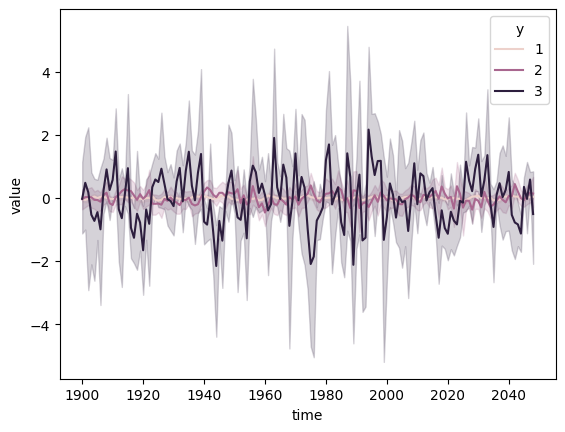

In [15]:
a = d[d.region == 'E1A']
a = a[a.time.between(1900,2049)]
sns.lineplot(data=a, x='time', y='value', hue='y')